THE SCENARIO


Researchers at GSK have been working on an innovative family of drugs to help people with solid tumours that continue to grow despite other treatments. A promising candidate, Miraculon-B (a fake name, obviously!), has been making its way through our development pipeline.

A late phase clinical trial for Miraculon-B has recently finished. This trial was focused on understanding if Miraculon-B was more effective than the standard of care in shrinking solid tumours in patients that don’t respond to other treatments. To determine this, the clinical trial data needed to be analysed to understand whether patients saw enough of a benefit from the treatment. Work is underway to present a package to the regulatory agencies that describes who is most likely to benefit from this new medicine and to seek agreement on our proposed strategy for aiding prescribers considering the value of Miraculon-B for their patients.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
study_df = pd.read_excel('data/clinical-study.xlsx',sheet_name='in')
study_df.head()

,subject_id,age,sex,weight,height,trt_grp,RESPONSE
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y


In [3]:
protein_df = pd.read_excel('data/protein-levels.xlsx',sheet_name='in')
protein_df.head()

,participant_id,protein_concentration
0,SUBJ_001,148.0
1,SUBJ_002,85.0
2,SUBJ_003,183.0
3,SUBJ_004,89.0
4,SUBJ_005,137.0


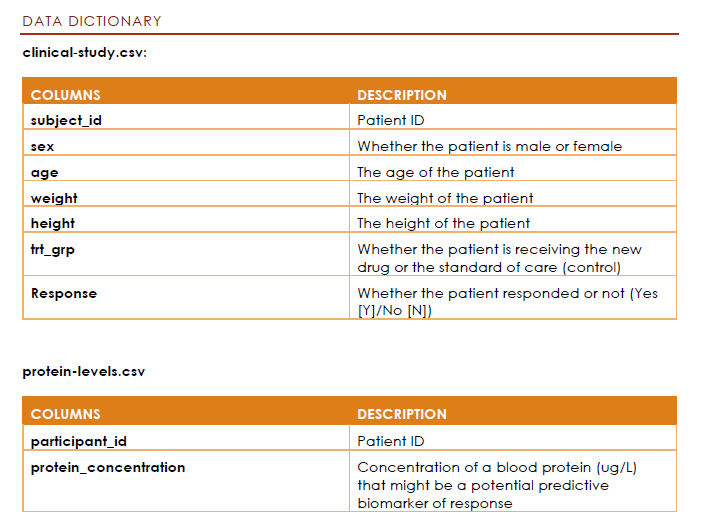

# Data Cleaning

Here participant_id & subject_id represent the entity so change it to a common name

In [4]:
study_df.rename(columns={'subject_id':'participant_id'},inplace=True)
study_df.head()

,participant_id,age,sex,weight,height,trt_grp,RESPONSE
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y


### Merge the two datasets using the subject_id column.

In [5]:

# Merge the two datasets on the subject_id column
merged_df = pd.merge(study_df, protein_df, on='participant_id')
merged_df.head()

,participant_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,148.0
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,148.0
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y,85.0
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N,183.0
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y,89.0


## Check for missing values and outliers.

In [6]:
# create a dataframe of percentage of null values
null_dict = (dict(merged_df.isna().mean().round(4)*100))
null_df = pd.DataFrame.from_dict(null_dict, orient="index").reset_index()
null_df.columns = ['col', 'null_percentage']
null_df = null_df.sort_values('null_percentage',ascending=False)
null_df.head(10)

,col,null_percentage
3,weight,1.43
7,protein_concentration,0.65
0,participant_id,0.00
1,age,0.00
2,sex,0.00
4,height,0.00
5,trt_grp,0.00
6,RESPONSE,0.00


In [7]:
merged_df.dtypes

participant_id            object
age                      float64
sex                       object
weight                   float64
height                   float64
trt_grp                   object
RESPONSE                  object
protein_concentration    float64
dtype: object

Shape before dropping duplicates

In [8]:
merged_df.shape

(769, 8)

In [9]:
# drop duplicate rows
merged_df.drop_duplicates(inplace=True)
merged_df.shape

(768, 8)

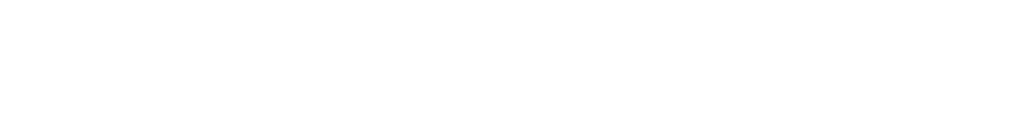

In [10]:
merged_df.dropna(inplace=True)
merged_df.shape

(752, 8)

### Create new Variables

In [11]:
merged_df.columns

Index(['participant_id', 'age', 'sex', 'weight', 'height', 'trt_grp',
       'RESPONSE', 'protein_concentration'],
      dtype='object')

In [12]:
merged_df['bmi'] = round(merged_df['weight']/merged_df['height']**2)
merged_df.head()

,participant_id,age,sex,weight,height,trt_grp,RESPONSE,protein_concentration,bmi
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,148.0,33.0
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y,85.0,26.0
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N,183.0,23.0
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y,89.0,28.0
5,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,N,137.0,43.0


## Analysis

To compare the mean age in the two treatment groups:

In [13]:
merged_df.groupby('trt_grp')['age'].mean()


trt_grp
CONTROL    61.809019
DRUG       61.672000
Name: age, dtype: float64

Compare mean age in responders vs non-responders

In [14]:
merged_df.groupby('RESPONSE')['age'].mean()


RESPONSE
N    61.656398
Y    61.848485
Name: age, dtype: float64

compare responders and non-responders in the two treatment arms

In [15]:
merged_df.groupby(['trt_grp', 'RESPONSE'])['age'].count()


trt_grp  RESPONSE
CONTROL  N           254
         Y           123
DRUG     N           168
         Y           207
Name: age, dtype: int64

compare mean weight in responders/non-responders:

In [16]:
merged_df.groupby('RESPONSE')['weight'].mean()


RESPONSE
N    89.939573
Y    93.188939
Name: weight, dtype: float64

compare protein concentration in responders vs non-responders

In [17]:
merged_df.groupby('RESPONSE')['protein_concentration'].mean()


RESPONSE
N    135.706161
Y    104.339394
Name: protein_concentration, dtype: float64

## Visualisation

Boxplot of age by response, separated by treatment group

<Axes: xlabel='RESPONSE', ylabel='age'>

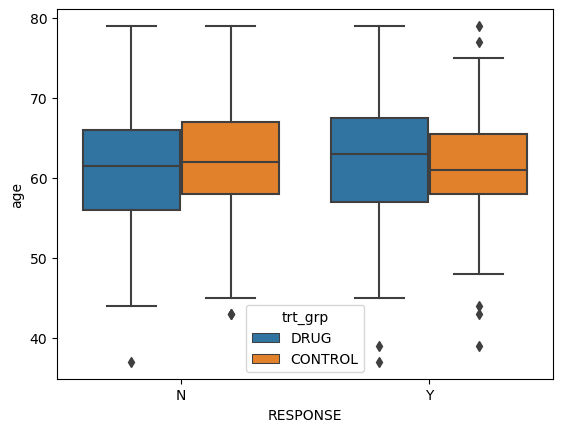

In [18]:
sns.boxplot(x='RESPONSE', y='age', hue='trt_grp', data=merged_df)

Boxplot of weight/BMI by response, separated by treatment group

<Axes: xlabel='RESPONSE', ylabel='weight'>

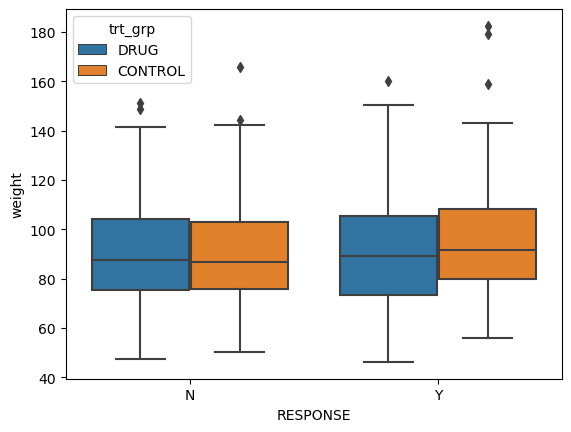

In [19]:
sns.boxplot(x='RESPONSE', y='weight', hue='trt_grp', data=merged_df)


Boxplot of protein_concentration by response, separated by treatment group

<Axes: xlabel='RESPONSE', ylabel='protein_concentration'>

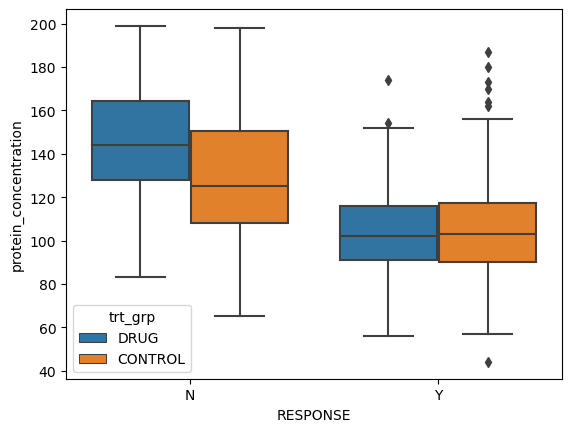

In [20]:
sns.boxplot(x='RESPONSE', y='protein_concentration', hue='trt_grp', data=merged_df)


Differences in protein concentration between responders and non-responders in each treatment group can be clearly observed